In [32]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [33]:
with open('dataset/data.txt', 'r') as file:
    data = file.readlines()

data = [line.strip().split(';') for line in data]

df = pd.DataFrame(data, columns=['text', 'emotion'])

print(df.head())

                                                text  emotion
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadness
3  i left with my bouquet of red and yellow tulip...      joy
4    i was feeling a little vain when i did this one  sadness


In [34]:
df["emotion"].unique()

array(['sadness', 'joy', 'fear', 'anger', 'love', 'surprise', None],
      dtype=object)

In [35]:
df['emotion'].isna().sum()

1

In [36]:
df= df.dropna()

In [37]:
df["emotion"].unique()

array(['sadness', 'joy', 'fear', 'anger', 'love', 'surprise'],
      dtype=object)

In [38]:
emotion_class = {'anger':0, 'sadness':1, 'fear':2, 'surprise':3, 'joy':4, 'love':5}

In [39]:
df['label'] = df['emotion'].map(emotion_class)
df

,text,emotion,label
0,im feeling rather rotten so im not very ambiti...,sadness,1
1,im updating my blog because i feel shitty,sadness,1
2,i never make her separate from me because i do...,sadness,1
3,i left with my bouquet of red and yellow tulip...,joy,4
4,i was feeling a little vain when i did this one,sadness,1
...,...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness,1
19996,i constantly worry about their fight against n...,joy,4
19997,i feel its important to share this info for th...,joy,4
19998,i truly feel that if you are passionate enough...,joy,4


<Axes: xlabel='emotion', ylabel='count'>

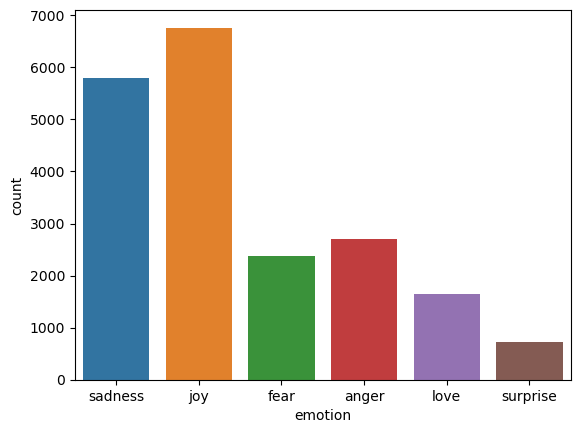

In [40]:
sns.countplot(data=df, x='emotion')

In [41]:
import spacy

nlp = spacy.load("en_core_web_lg") 


def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [42]:
df['prepocessed_text']= df['text'].apply(preprocess)

In [43]:
df

,text,emotion,label,prepocessed_text
0,im feeling rather rotten so im not very ambiti...,sadness,1,m feel rotten m ambitious right
1,im updating my blog because i feel shitty,sadness,1,m update blog feel shitty
2,i never make her separate from me because i do...,sadness,1,separate don t want feel like m ashamed
3,i left with my bouquet of red and yellow tulip...,joy,4,leave bouquet red yellow tulip arm feel slight...
4,i was feeling a little vain when i did this one,sadness,1,feel little vain
...,...,...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness,1,m have ssa examination tomorrow morning m prep...
19996,i constantly worry about their fight against n...,joy,4,constantly worry fight nature push limit inner...
19997,i feel its important to share this info for th...,joy,4,feel important share info experience thing
19998,i truly feel that if you are passionate enough...,joy,4,truly feel passionate stay true succeed


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['prepocessed_text']], df['label'], train_size=0.8, random_state=47, stratify=df['label'])